In [6]:
# import pandas using the alias pd
import pandas as pd

# import numpy using the alias np
import numpy as np

# import matplotlib.pyplot using the alias plt
import matplotlib.pyplot as plt

# call the magic function to display matplotlib plots inline
%matplotlib inline

In [7]:
# useful stuff for later

# make sure these files are the names of the files you have (you may need to add .gz to the end)
# putting the filenames in variables so they can be modified once without having to be updated
# everywhere else.
tmdb_movies = 'tmdb.movies.csv.gz'
movie_budgets = 'tn.movie_budgets.csv.gz'

genre_ids = {'10402':'music', 
             '10749':'romance', 
             '10751':'family', 
             '10752':'war', 
             '10770':'tv_movie', 
             '12':'adventure', 
             '14':'fantasy', 
             '16':'animation', 
             '18':'drama', 
             '27':'horror', 
             '28':'action', 
             '35':'comedy', 
             '36':'history', 
             '37':'western', 
             '53':'thriller', 
             '80':'crime', 
             '878':'science_fiction', 
             '9648':'mystery', 
             '99':'documentary',
             '':'UNK'}

# make a list of the genres to use as column titles
genre_list = list(sorted(genre_ids.values()))

def split_genres(genre_id_list):
    return [genre_ids[genre_id] for genre_id in genre_id_list.strip('[]').split(', ')]

In [8]:
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [9]:
# this function can be used to give you a quick preview of your dataframe, to make sure
# small changes (like changing the dtype of a column) are having the effect you want

def preview_data(df):
    # print the result of calling df.info(), to see what types of data you have
    print(df.info())
    # return the first few rows (the head) of df
    return df.head()

# here's some test data so you can see if preview_data is working correctly
test_df = pd.DataFrame([{'a':2, 'b':-7, 'c':12}, {'a':'4', 'b':13, 'c':-1}, {'a':1.5, 'b':10, 'c':-999}])

# call preview_data and pass it test_df to see what happens
preview_data(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       3 non-null      object
 1   b       3 non-null      int64 
 2   c       3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes
None


,a,b,c
0,2,-7,12
1,4,13,-1
2,1.5,10,-999


In [10]:
# this function is used later, to convert a column of strings like, ''$400,000,000' into
# floats that can be used in math, like 400000000

def clean_money_string(amount):
    # if the type of the variable "amount" is str
    # first, replace the commas ',' in the string with ''
    # next, strip the dollar sign '$' from the string
    # finally, convert the string to a float
    # return the converted value
    # if the type of the variable "amount" is not a string, just return amount
    if type(amount) == str:
        a = amount.replace(',', '').strip('$')
        b = float(a)
        return b
    if type(amount) != str:
        return amount

# test the function clean_money_string to see if it's doing what you think it is
# see what is returned when you pass it '$500,000,000'
# see what is returned when you pass it 500000000
# see what the type of the return value is (it should be float)

clean_money_string('$500,000,000')


500000000.0

In [11]:
#saving
#return(float(amount.replace(',', '').strip('$')))

In [12]:
preview_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
def get_tm_movie_budgets():
    #create a dataframe, read the file whose name is stored as variable movie_budgets
    #check datatypes of columns and change to appropriate types
    #clean money columns using .apply and make new cols
    #create month and year columns
    #create a column for profitability = (worldwide gross - budget)/budget
    #create a new dataframe showing only the relevant columns
    df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
    df['release_date'] = df['release_date'].astype('datetime64[ns]')   
    
    df['prod_budget_in_mil'] = (df['production_budget'].apply(clean_money_string))/1000000
    
    df['world_gross_in_mil'] = round(((df['worldwide_gross'].apply(clean_money_string))/1000000), 1)
    
    df['month'] = df['release_date'].apply(lambda x: x.month)
    df['year'] = df['release_date'].apply(lambda x: x.year) 
      
    df['profitability'] = round(((df['world_gross_in_mil'] - df['prod_budget_in_mil'])/ df['prod_budget_in_mil']), 1)
    df_clean = df[['movie', 'release_date', 'month', 'year', 'prod_budget_in_mil', 'world_gross_in_mil', 'profitability']]
    return df_clean
df_clean = get_tm_movie_budgets()
preview_data(df_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie               5782 non-null   object        
 1   release_date        5782 non-null   datetime64[ns]
 2   month               5782 non-null   int64         
 3   year                5782 non-null   int64         
 4   prod_budget_in_mil  5782 non-null   float64       
 5   world_gross_in_mil  5782 non-null   float64       
 6   profitability       5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB
None


,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,410.6,1045.7,1.5
2,Dark Phoenix,2019-06-07,6,2019,350.0,149.8,-0.6
3,Avengers: Age of Ultron,2015-05-01,5,2015,330.6,1403.0,3.2
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,12,2017,317.0,1316.7,3.2


In [69]:
df_clean.prod_budget_in_mil.value_counts()

20.000000    231
10.000000    212
30.000000    177
15.000000    173
25.000000    171
            ... 
6.750000       1
6.250000       1
0.009000       1
0.385907       1
12.800000      1
Name: prod_budget_in_mil, Length: 509, dtype: int64

In [218]:
# this function will load the information from tmdb.movies.csv
# create a dataframe called df, and use read_csv to read in the data from the file whose name is stored
    # in tmdb_movies
    # convert the 'release_date' column into datetime format
    # preview the data returned by tmdb_movies once you have code that returns a dataframe
# preview_data(get_tmdb_movies())
def get_tmdb_movies():
    genres = pd.read_csv('zippedData/tmdb.movies.csv.gz')
    genres['release_date'] = genres['release_date'].astype('datetime64[ns]')   
    return genres

df2 = get_tmdb_movies()
preview_data(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [220]:
#Make a function to split the genres

def split_genres():
    df2['genre_ids'].str.split(pat=',', expand=True)

split_genres()
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [224]:
# this function is going to do a lot of the important work for us when it comes to 
# analyzing specific genres.
# now keep only the movies with 'en' in the 'original_language' column
# now drop all columns except for 'title' and 'genre_ids'
# create a new column called 'genres' by splitting the 'genre_ids' column,
   
def get_title_and_genres():
    genres_df = get_tmdb_movies()
    genres_df['original_language'] = genres_df['original_language'].astype(str)
    #creates a series that is true or false, and checks to see if this is true, makes boolean mask
    genres_df = genres_df[genres_df['original_language'] == 'en']
    

    #genres_df = genres_df.reindex(columns = ['title', 'genre_ids'])
    
    
    #genres_df['genre_ids'].apply(split_genres)
    
    
    return genres_df

    
    
    # now we're going to iterate through genre_list. for each genre in genre_list, 
    # create a new column with the name of that genre, and assign it a value by calling
    # the apply method on the genres column, and passing it a lambda function that will
    # take a variable "x", and check to see if genre is in "x".
    # this is checking to see if the genre is in the list of genres for the movie, and assigning
    # True if the genre is in the last, and False otherwise
    
    
    # now you can drop 'genres' and 'genre_ids' from axis 1 and return the dataframe

    
# preview the dataframe
df3 = preview_data(get_title_and_genres())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23291 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         23291 non-null  int64         
 1   genre_ids          23291 non-null  object        
 2   id                 23291 non-null  int64         
 3   original_language  23291 non-null  object        
 4   original_title     23291 non-null  object        
 5   popularity         23291 non-null  float64       
 6   release_date       23291 non-null  datetime64[ns]
 7   title              23291 non-null  object        
 8   vote_average       23291 non-null  float64       
 9   vote_count         23291 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB
None


In [ ]:
#code from Sam
def sort_genres(df):
    genre_dict = defaultdict(int)
    genre_list = np.array(df.genres)
    for genre in tqdm(genre_list): 
        g_split = genre.split('|')
        for i in g_split:
            genre_dict[i]+=1
    for g in tqdm(genre_dict.keys()): 
        df[f'{g}'] = [0 for i in range(len(df))]
    for pos in tqdm(range(len(df))): 
        row = df.iloc[pos]
        g_split = row['genres'].split('|')
        for i in g_split: 
            df.iloc[pos, df.columns.get_loc(f'{i}')] = 1
    df.to_csv('Project1Flatiron/UsedData/MovieLensMoviesCleaned.csv', index = False)
    return df

In [237]:
df3['id'] = df3.genre_ids.str.strip("[").str.strip("]")

In [239]:
pd.DataFrame(df3.id.str.split(',').tolist(), index=df3.index)

,0,1,2,3
0,12,14,10751,None
1,14,12,16,10751
2,12,28,878,None
3,16,35,10751,None
4,28,878,12,None


In [ ]:
#do .explode
#then do one hot encoding

genre_ids = {'10402':'music',   
             '10749':'romance', 
             '10751':'family', 
             '10752':'war', 
             '10770':'tv_movie', 
             '12':'adventure', 
             '14':'fantasy', 
             '16':'animation', 
             '18':'drama', 
             '27':'horror', 
             '28':'action', 
             '35':'comedy', 
             '36':'history', 
             '37':'western', 
             '53':'thriller', 
             '80':'crime', 
             '878':'science_fiction', 
             '9648':'mystery', 
             '99':'documentary',
             '':'UNK'}
# make a list of the genres to use as column titles
genre_list = list(sorted(genre_ids.values()))
def split_genres(genre_id_list):
    return [genre_ids[genre_id] for genre_id in genre_id_list.strip('[]').split(', ')]
:+1:
1



In [222]:

#make a list of genres from the genre_ids column
genre_list = df2['genre_ids'].tolist()

#.explode


#lambda x: 
# now we're going to iterate through genre_list. for each genre in genre_list, 
    # create a new column with the name of that genre, and assign it a value by calling
    # the apply method on the genres column, and passing it a lambda function that will
    # take a variable "x", and check to see if genre is in "x".
    # this is checking to see if the genre is in the list of genres for the movie, and assigning
    # True if the genre is in the last, and False otherwise
    
genre_list

['[12, 14, 10751]',
 '[14, 12, 16, 10751]',
 '[12, 28, 878]',
 '[16, 35, 10751]',
 '[28, 878, 12]',
 '[12, 14, 10751]',
 '[28, 12, 14, 878]',
 '[16, 10751, 35]',
 '[16, 10751, 35]',
 '[16, 28, 35, 10751, 878]',
 '[16, 35, 10751]',
 '[10751, 14, 12]',
 '[53, 12, 28]',
 '[16, 10751]',
 '[27, 80]',
 '[12, 14, 18, 10749]',
 '[28, 53, 878]',
 '[10402, 10749]',
 '[28, 18, 53]',
 '[18, 53, 9648]',
 '[28, 18, 9648, 53]',
 '[28, 35]',
 '[12, 10751, 14]',
 '[18, 10749]',
 '[53, 28, 12, 35, 80]',
 '[18, 36]',
 '[28, 35, 80, 53]',
 '[28, 12, 10751, 14]',
 '[28, 878, 12, 53]',
 '[18]',
 '[28, 53]',
 '[18, 36]',
 '[28, 53, 878, 12]',
 '[28, 18, 9648, 53]',
 '[12, 14, 28]',
 '[35, 10749]',
 '[28, 12, 18]',
 '[35, 14, 10751]',
 '[35, 12, 14, 16, 10751]',
 '[35]',
 '[14, 12, 28, 35, 18]',
 '[28, 35, 10749]',
 '[35]',
 '[35, 10749]',
 '[80, 18, 28, 53]',
 '[27]',
 '[28, 53]',
 '[18, 53]',
 '[16, 12, 10751, 14]',
 '[10749, 18]',
 '[12, 28, 18]',
 '[28, 35, 80]',
 '[80, 18, 53]',
 '[28, 37, 18, 14, 53]',


In [ ]:
# this function will merge the previous two dataframes into one big dataframe.

def merge_budgets_and_genres():
    # create two dataframes. one should get the dataframe from get_tm_movie_budgets, and the other should
    # get the dataframe from get_title_and_genres.
    
    
    
    # create a new dataframe by merging the two dataframes above. you want to merge the budgets dataframe
    # on the 'movie' column and the genres dataframe on the 'title' column. 
    # you'll have a duplicate column, so drop 'title' from axis 1 once you've merged.
    # bonus: do this all in one line
    
    
    # there are some duplicates in the dataset. drop duplicates that match on 'movie' and 'rd'
    
    
    # sort_values by the 'movie' column and return the dataframe

# preview the dataframe

## ScatterPlot: Budget vs. Worldwide Gross

In [15]:
preview_data(df_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie               5782 non-null   object        
 1   release_date        5782 non-null   datetime64[ns]
 2   month               5782 non-null   int64         
 3   year                5782 non-null   int64         
 4   prod_budget_in_mil  5782 non-null   float64       
 5   world_gross_in_mil  5782 non-null   float64       
 6   profitability       5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 316.3+ KB
None


,movie,release_date,month,year,prod_budget_in_mil,world_gross_in_mil,profitability
0,Avatar,2009-12-18,12,2009,425.0,2776.3,5.5
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,410.6,1045.7,1.5
2,Dark Phoenix,2019-06-07,6,2019,350.0,149.8,-0.6
3,Avengers: Age of Ultron,2015-05-01,5,2015,330.6,1403.0,3.2
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,12,2017,317.0,1316.7,3.2


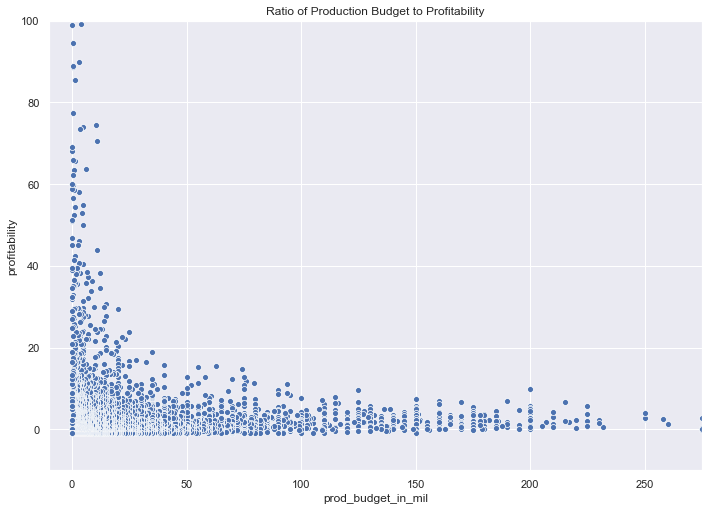

Text(0, 0.5, 'Profitability in Multiples of Production Budget')

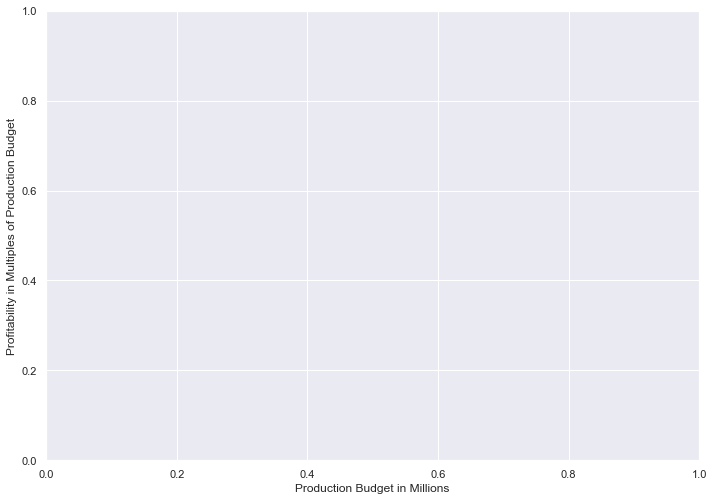

In [92]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig = sns.scatterplot(x = df_clean['prod_budget_in_mil'], y = df_clean['profitability'])\
.set_title('Ratio of Production Budget to Profitability')
plt.xlim(-10, 275)
plt.ylim(-10, 100)
plt.show(fig)
sns.set()
plt.xlabel('Production Budget in Millions') #NOT SHOWING
plt.ylabel('Profitability in Multiples of Production Budget') #NOT SHOWING

#color graph by genre


# "Production Budget in Millions"
# "Profitability in Multiples of Production Budget"

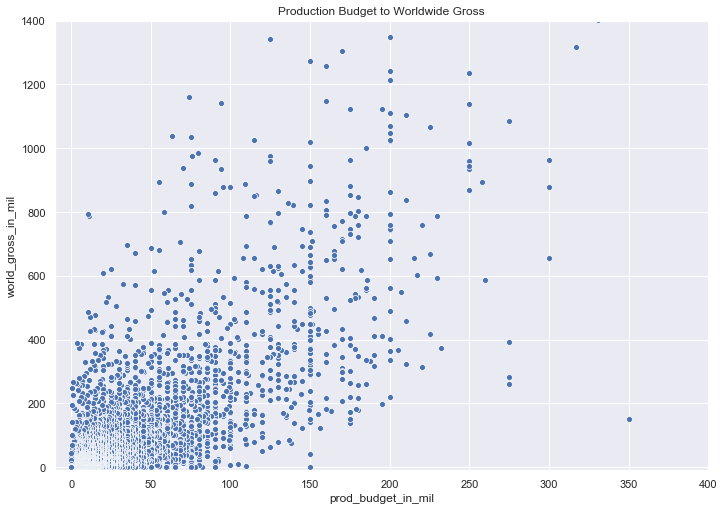

In [104]:
# scatter budget vs worldwide gross
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig = sns.scatterplot(x = df_clean['prod_budget_in_mil'], y = df_clean['world_gross_in_mil'])\
.set_title('Production Budget to Worldwide Gross')
plt.xlim(-10, 400)
plt.ylim(-10, 1400)
plt.show(fig)
sns.set()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7a891c450>,
      dtype=object)

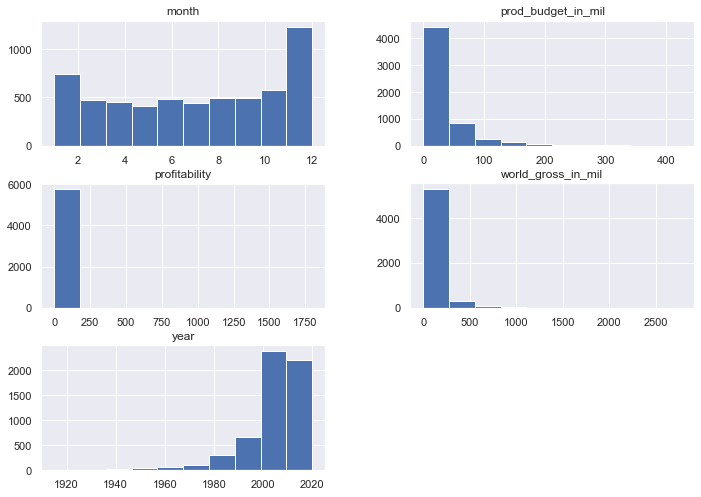

In [90]:
df_clean.hist()

In [37]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.scatter(df_clean, x='prod_budget_in_mil', y='profitability')
fig.show()